In [90]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [91]:
df = pd.read_csv('../Data/data_processed_final.csv')

# for convenience
df.set_index('original_title', inplace=True)
df.drop(columns=['fixed_budget', 'fixed_revenue',
       'budget','revenue'], inplace=True)


Borderline for good/bad movie is: 7.479509992784861


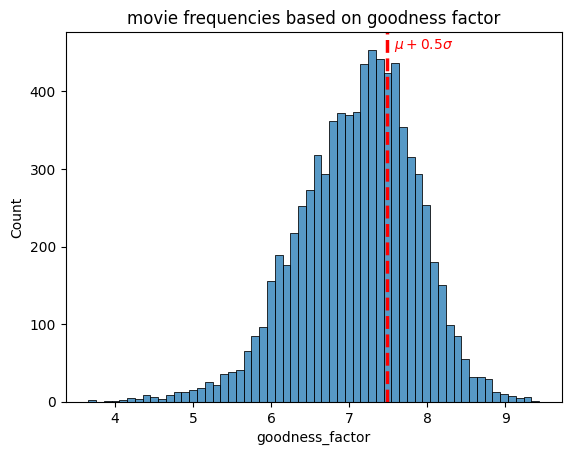

In [92]:
border = df['goodness_factor'].mean() + 0.5*df['goodness_factor'].std() 
print(f'Borderline for good/bad movie is: {border}')


sns.histplot(df['goodness_factor'])
plt.axvline(x=border, color='red', ls='--', 
        lw=2.5)
style = dict(size=10, color='red')
plt.text(x=border+0.1, y=455, s='$\mu+0.5\sigma$', **style)
plt.title('movie frequencies based on goodness factor')
plt.show()


Split movies based on the goodness factor

In [93]:

#Comparison between two groups?
df['is_good'] = df['goodness_factor']>border

#Binary if needed
#df['is_good'] = df['is_good'].replace({True: 1, False: 0})

bad_movies = df.loc[df['goodness_factor']<border]
good_movies = df.loc[df['goodness_factor']>=border]

bad_movies = bad_movies.sort_values(by='goodness_factor')
good_movies = good_movies.sort_values(by='goodness_factor', ascending=False)

worst_movie = bad_movies.head(1)
best_movie = good_movies.head(1)


Reset index for plots

In [94]:
df = df.reset_index()
print(df.head(1))

            original_title    id  runtime                    genres  \
0  The Empire Strikes Back  1891      124  Adventure,Action,Fiction   

   vote_average  vote_count  popularity  year  month  day   fixed_gross  \
0           8.4       14567       26.96  1980      5   20  1.927225e+09   

   gross_factor  pop_factor  freshness_factor  runtime_factor  \
0      9.766115    9.363771               0.0        4.822816   

   goodness_factor  is_good  
0         5.988176    False  


Descriptions of the ..

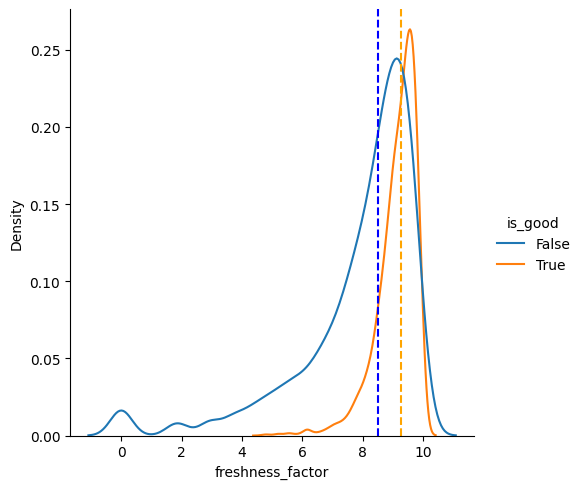

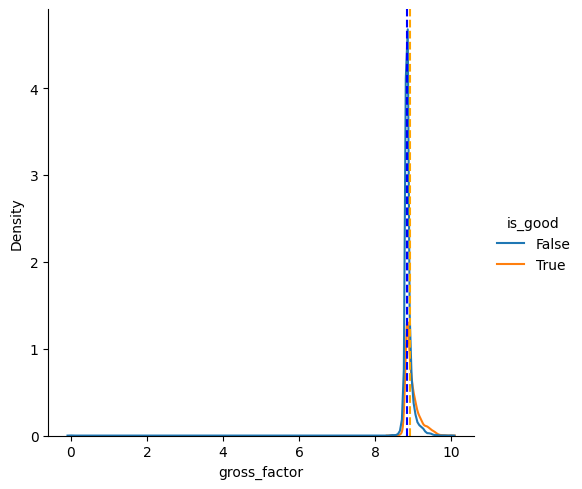

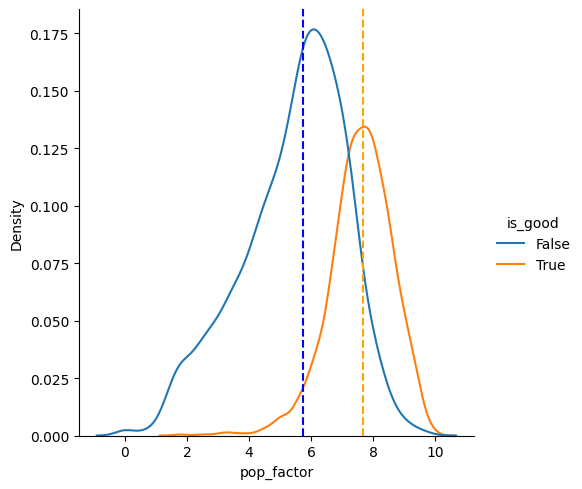

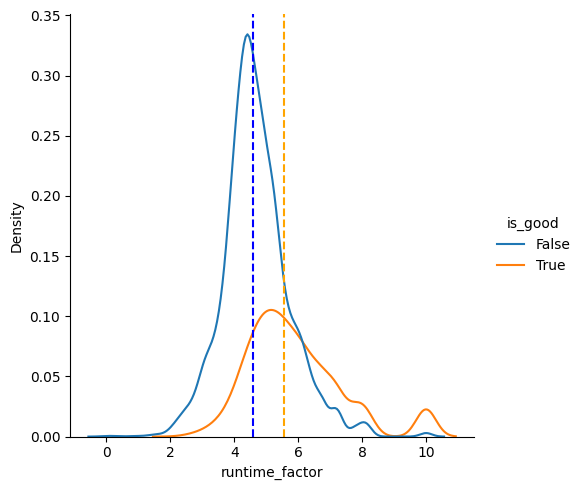

In [95]:
for i in ['freshness_factor', 'gross_factor', 'pop_factor', 'runtime_factor']:
    sns.displot(df, x=i, hue='is_good', kind='kde')
    plt.axvline(x=bad_movies[i].median(), color='blue', ls='--', 
            lw=1.5)
    plt.axvline(x=good_movies[i].median(), color='orange', ls='--', 
            lw=1.5)
    plt.show()


##print(bad_movies.describe())
#print(good_movies.describe())

Set index back

In [96]:
df = df.set_index('original_title')

Comparison between TMDB's 'popularity' and our goodness factor. First we need to scale the data so its comparable.

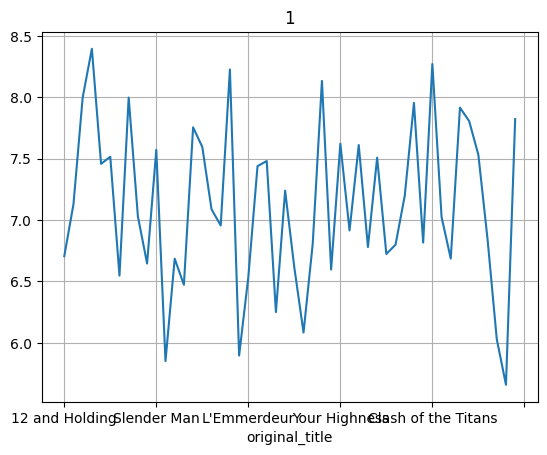

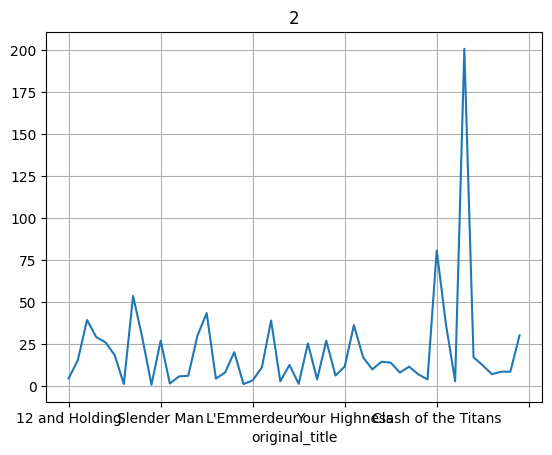

In [97]:
tmpr_data = df[['goodness_factor', 'popularity']].copy()
data_sample = tmpr_data.sample(n=50)
data_sample['goodness_factor'].plot(grid=True, title='1')
plt.show()
data_sample['popularity'].plot(grid=True, title='2')
plt.show()

Trying to scale 'popularity' here down to 1-10

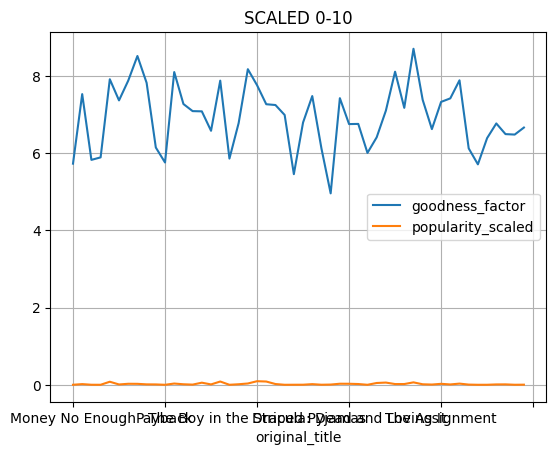

                                                    goodness_factor  \
original_title                                                        
Messengers                                                 3.659855   
Als Unku Edes Freundin war                                 3.752813   
Heartbeeps                                                 3.944401   
Heaven's Gate                                              3.998290   
For Colored Girls Who Have Considered Suicide/W...         4.058095   
...                                                             ...   
The Mummy                                                  9.299502   
Love, Simon                                                9.300110   
Sing 2                                                     9.305954   
Mortal Kombat                                              9.308389   
Me Before You                                              9.432175   

                                                    popularity  \
original_t

In [98]:
min_val, max_val = min(df['popularity']), max(df['popularity'])
tmpr_data['popularity_scaled'] = df['popularity'].apply(lambda x: 10*(x-min_val)/(max_val-min_val))

tmpr_data_2 = tmpr_data[['goodness_factor', 'popularity_scaled']]

tmpr_data_2.sample(n=50).plot(grid=True, title='SCALED 0-10')
plt.show()
print(tmpr_data.sort_values(by='goodness_factor'))
print(tmpr_data.sort_values(by='popularity'))
print(tmpr_data.describe())

print(f'Correlation between the two: {tmpr_data.corr()}')
